<h1 style="font-size:3rem;color:black;">       Assignment #1: Tutorial on Making Histograms</h1>

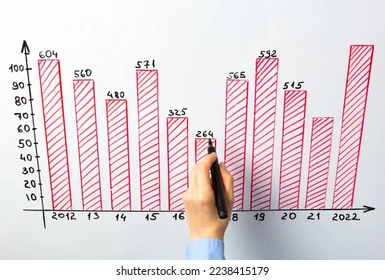

We've seen a lot of plots during the past few classes at our time here in AST-51/151, but we've never really dwelled too
deeply on programming these "pretty-plots" ourselves...

*Our tutorial here focuses primarily on creating and programming histograms for your own use.*


# BUT! 
## We need to settle a few things before we start teaching you how to make a histogram yourself...

### Are you sure you want to be using Histograms for plotting your data set?

Its pretty simple-- a histogram plots data in terms of the frequency each data point appears. 

For example, we could have ages of students in AST-51 on the x-axis and frequency of each age on the y-axis. We could also plot the percentage of each age on the y-axis, depending on what you want to emphasize to your reader. 

This style of plot can be incredibly useful if you want to show any kind of distribution in your data. 

If we go back to our first example with the AST-51 class and age, there may not be a clear difference between a Histogram and, say, a bar graph. 

However, if we were to plot a distribution of ages across the entire campus via a histogram, a aistogram may give a more clear picture as to what the distribution of those ages look like, rather than discrete values plotted next to one another from a bar graph.

### Setting up the scenario...

For our purposes, we're going to be looking at data from the NBA regarding player heights both from 2008-2009 and 2018-2019 (https://www.openintro.org/data/index.php?data=nba_heights) to create a histogram that plots the heights of NBA players and their frequency to visually represent the distribution of the heights. 

*Of course- you may choose to use any type of data you want. However, if you are wondering, we did find the website linked above to be a great tool for gathering data files.*

# Lets start at the very beginning...

## Importing all the packages

Before we start coding in great length, we need to import all of our packages! 

I like to think of python as a workbench. If you just have your hands and some materials, you can make some very basic things on a workbench. In order to work on more complicated projects, however, you need tools which are located in a toolbox. 

In our case, the toolboxes are the packages that we will import, and the functions inside those packages are our tools! We would like a tool that is good at plotting, one that is good at opening up data files, and one that can make calculations much easier.

In [1]:
#matplotlib is package that has helpful plotting tools
from matplotlib import pyplot as plt

#pandas can help us easily convert a csv file to a pandas dataframe (that will easily become a numpy array)
import pandas as pd

#numpy can help us do some basic calculations (edited) 
import numpy as np

We've been introduced to a lot of these packages already in class, but just to rejog your memory-- pyplot from matplotlib is a plotting libray that provides a MATLB-like interface to create 2D/3D graphs, while NumPy is a separate library that allows us to do basic arithmetics in our program with built-in functions. Lastly, Pandas is a very common library used in the python world, that is actually built on the Numpy library’s tools! 

## Reading in data via CSV files

For the purposes of making "pretty histograms", we are going to use Pandas to read in comma seperated value (csv) files. When Pandas reads in the CSV file, it creates an object called a dataframe (which is basically just a fance Numpy array).

In [2]:
# Use pandas to read in a csv file using the function .read_csv(), where the filename is the input of the function #
# Then assign this dataframe to a variable. We are using NBA data from 2008 and 2019, so they are named accordingly #

nba_2008 = pd.read_csv("nba_heights.csv")
nba_2019 = pd.read_csv("nba_players_19.csv")

# Writing the variable name will print the dataframe to your console #
nba_2008
#nba_2019

,last_name,first_name,h_meters,h_in
0,Acker,Alex,1.96,77
1,Adams,Hassan,1.93,76
2,Afflalo,Arron,1.96,77
3,Ager,Maurice,1.96,77
4,Ajinca,Alexis,2.13,84
...,...,...,...,...
430,Wright,Lorenzen,2.11,83
431,Ming,Yao,2.29,90
432,Jianlian,Yi,2.13,84
433,Young,Nick,1.98,78


When we run the code above, you'll see that a tabular representation of the data from the CSV file gets printed to the console (i.e., your dataframe). We do this just to make sure that all the necessary information from the data file is imported into our correctly. So far, so good!

Now, we can easily use our dataframe (df) to create a numpy array for the data we want to plot! In our case, we want all of the data in the heights catagory, so we will index that data. 

In [3]:
# To index the appropriate column of our df, you just need the variable name with the column name in brackets #
# You can also tag a .column-name to the end of the df, both do the same job #

heights = nba_2019['height']
heights2 = nba_2019.height 

# sanity check: heights will be the same as heights2
print(heights)
print(heights2)

0      78
1      74
2      84
3      82
4      78
       ..
489    80
490    74
491    84
492    83
493    85
Name: height, Length: 494, dtype: int64
0      78
1      74
2      84
3      82
4      78
       ..
489    80
490    74
491    84
492    83
493    85
Name: height, Length: 494, dtype: int64


Afterwards, we can can convert the necessary data (for us-- the heights) from their respective columns into NumPy arrays,
and assign these arrays as new variables for computational reasons shown later on in this tutorial. 

In [4]:
# In order to convert your data to a numpy array, you can use the function .to_numpy() on the column you are calling 
# Then assign that to a variable 

newHeight = nba_2019['height'].to_numpy() 
oldHeight = nba_2008['h_in'].to_numpy()

## Creating a (bare-bones) Histogram

Now we have our array of data! We can plot this as a histogram by calling matplotlib (recall from earlier wherein we called as plt when we imported in all of our packages). Note that the histogram function is called using .hist(). 

Let's plot a very basic histogram, that includes the data, x/y axis labels, and a title...

Text(0.5, 1.0, 'NBA player height in 2008')

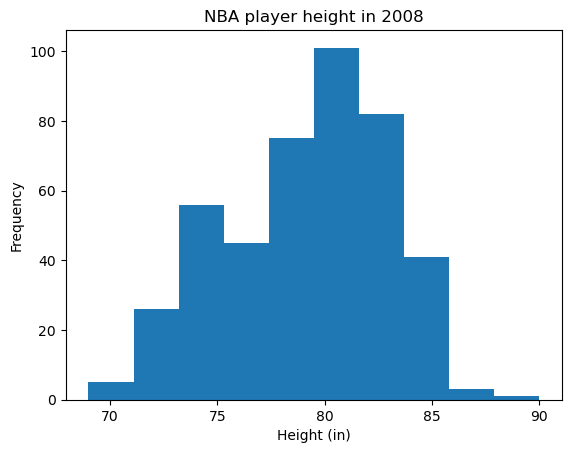

In [5]:
plt.hist(oldHeight) # This plots a histogram using data from our array called oldHeights
plt.xlabel('Height (in)') # labels the x-axis
plt.ylabel('Frequency') # labels the y-axis
plt.title('NBA player height in 2008') # Put a title at the top of our plot

Huzzah!! It works!

## Histogram Customizations

We have our first histogram... but we can do much better. There are many different customizations we can use to make our plot look much more appealing to the eye. For instance, it's hard to tell where the data starts and ends for a given height on this plot. This has to do with the amount of "bins" we put our data into, as well as visual seperation using lines. 

Let's first start by creating a function that can "automagically" create the amount of bins we need. 

In [6]:
# Function to check the range of an array. This is used for the number of bins in the histogram
# We want as many bins as there are integer values of heights
def checkBins(array):
    return np.max(array) - np.min(array)

This function will take an array of data as its input, and returns the range of this data (an integer value). This is calculated by using the .max() and .min() functions in numpy, which take the maximum and minimum value of an array, respectively. The range is then the min subtracted from the max. Great. 

So far we have not explored many of the keyword arguments that the .hist() function has available to us. Let's twist a few more of these customization knobs and make our plot even prettier by customizing some of the color options and playing with the font sizes.

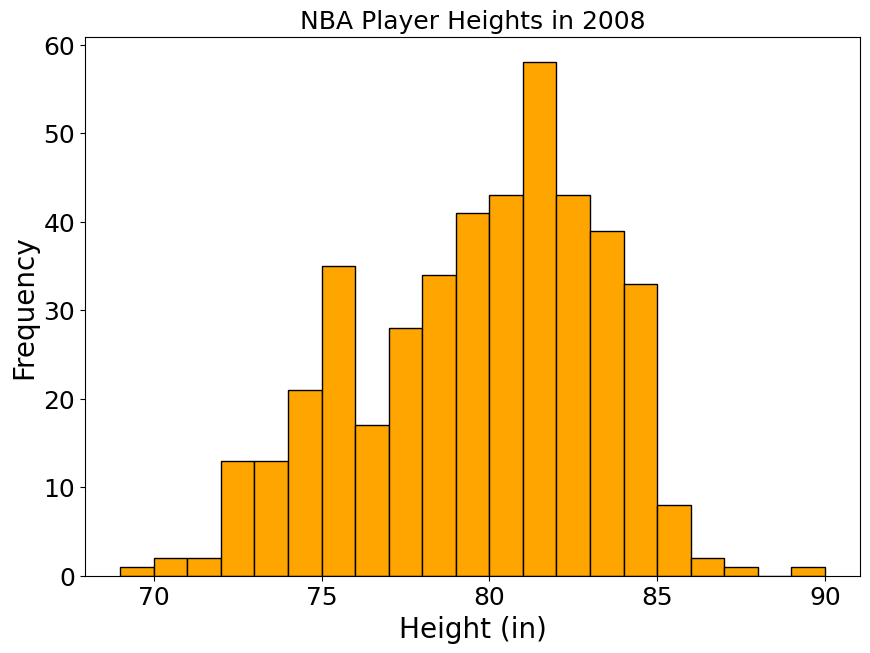

In [15]:
# Get the number of bins
bins = checkBins(oldHeight) 

### Create the histogram using some new keyword arguments ###
# bins allows you to manually set the # of bins, which we calculated above
# edgecolor allows you to outline each height value bar to better differentiate between heights
# color sets the color of the histogram. Some other values are 'r' for red, 'b' for blue
plt.hist(oldHeight, bins=bins,
         edgecolor='black', color = 'orange') 

# Using the fontsize parameter ensures the labels are readable
plt.xlabel('Height (in)',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('NBA Player Heights in 2008', fontsize=18)


# .rcParams() (runtime configuration parameters) is a function used to change some of the aspects of the plot
# here, we are adjusting the size of the figure. The entries go [width, height]. 
plt.rcParams['figure.figsize'] = [10,7]

plt.show()

Notice the addition of ticks parameter in our updated program/graph. This features allows the numerical values or any other labels marking intervals on both axes to be displayed in a larger font to make it easier to look at.

Now the histogram is looking much more readable!  

## Adding Lines & Labels

To aid the eye of your viewer, it may sometimes be a good idea to plot where on the histogram our mean value is. To effectively show this, you can add vertical lines to the plot at the points of interest. 

The function used for this is .axvline(). This function can be called on plt or ax, depending on if you are plotting subplots or not. The function takes in parameters for the x value, y minimum value and y maximum value as well as taking other arguments for altering the line itself. The x value is the x coordinate of where the vertical line will be plotted. The y values are float values betwen 0 and 1 that determine where the line will start and stop. If left unchanged, the line will span the entire plot. 

An implementation example is shown below. This line is plotting the median of the dataset, therefore, that is the x value. There are no y value paramaters given to the function, so the line spans the entirety of the plot. Parameters such as color, linestyle and linewidth were given to the function to better style the line.

The .text() function takes as input the x-coordinate, y-coordinate, string of what you want to say, and other keyword arguments. Having important values directly listed can help your reader easily understand what you are trying to convey with your data.

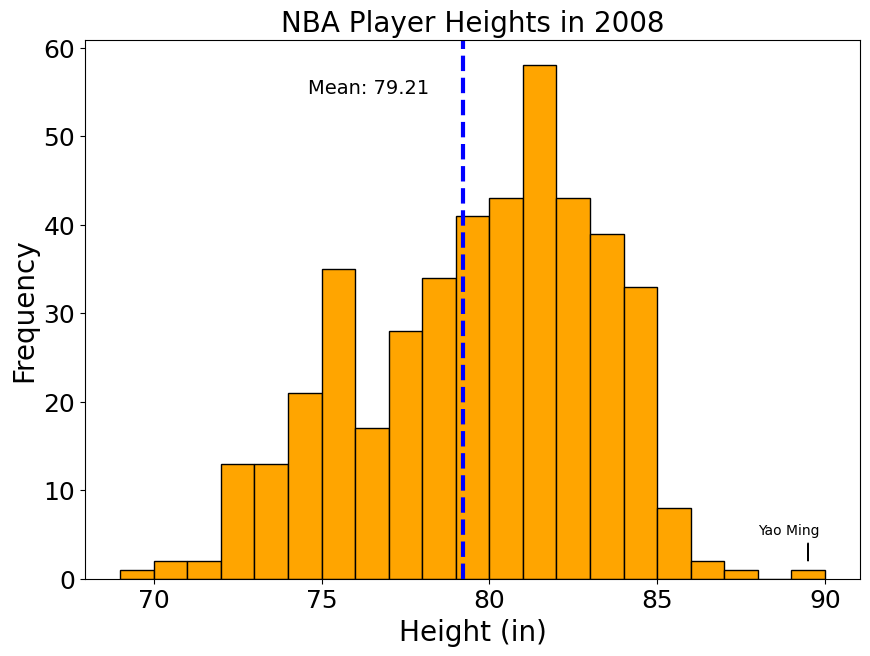

In [16]:
bins = checkBins(oldHeight)

plt.hist(oldHeight, bins=bins,
         edgecolor='black', color = 'orange') 

########################### CODE ABOVE IS UNCHANGED FROM BASE HISTOGRAM ###########################################

# linestyle changes the line from solid to whatever style you choose. Other options are 'dot', 'dashdot'...
# linewidth thickens the line so its easier to see
# ha or horizontal allignment changes how the text is alligned ('center', 'left', or 'right')
# .ylim() gives you the range of y values that you are plotting a line over
# f'' is a format string, that allows you to call non-string values within a string

plt.axvline(np.mean(oldHeight), color='b', linestyle='dashed', linewidth=3)

plt.text(np.mean(oldHeight)-1, plt.ylim()[1]*0.9, f'Mean: {np.mean(oldHeight):.2f}', 
         color='Black', ha='right',fontsize = 14)


## Make Yao Ming even more obvious ##
plt.text(88,5, "Yao Ming")
plt.arrow (89.5,2,0,2) #.arrow(starting-x, starting-y, ending-x, ending-y)

########################### CODE BELOW IS UNCHANGED FROM BASE HISTOGRAM ###########################################

plt.xlabel('Height (in)',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('NBA Player Heights in 2008', fontsize=20)
plt.rcParams['figure.figsize'] = [10,7]


plt.show()

Now someone viewing this plot can see the spread of NBA player heights in 2008 as well as the mean very quickly, which is the goal of this plot! (Also notable outliers... Yao Ming deserves more praise). 

## Adding Bar Labels

To add labels to the top of each bar, you can use the .bar_label() function. Similarly to .text() and .axvline(), this can be used with both plt and ax. The main parameters of this function include the container with the bars, the labels and the label type. 

The container will typically just be a bar container object that includes all the bins. This is outputted after calling plt.hist(). The labels are given in the form of an array, but they are optional. If not given, the default labels are just data values on the plot. 

There are two different label types, edge and center. These determine whether the labels will be at the end point of the bar or the center. You can add additional parameters to help with styling the text of the labels. An example is shown below. Here, the bars container is passed in, and parameters such as color and fontsize are passed in to style the label text.

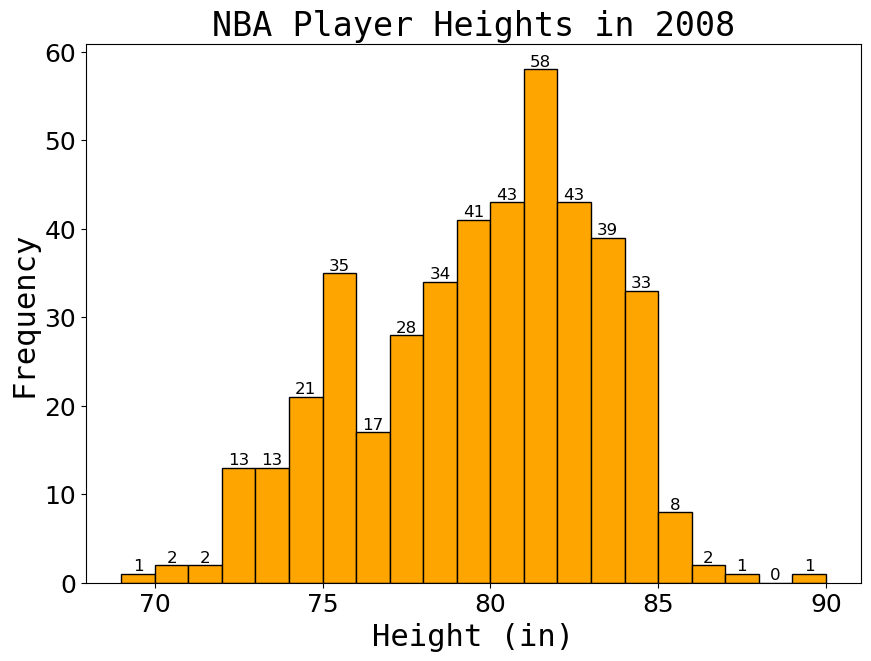

In [13]:
bins = checkBins(oldHeight)

########################### CODE ABOVE IS UNCHANGED FROM BASE HISTOGRAM ###########################################

# Save the outputs of the histogram function
# The histogram function has 3 outputs. The first output is an array of the counts or y values of the bars
# The second output is an array of the x values of the bins, otherwise known as the bin edges.
# The 3rd output is a container object containing all the bars. This container is used for the bar_label function.
counts, bin_edges, bars = plt.hist(oldHeight, bins=bins,
        edgecolor='black', color = 'orange') 

plt.bar_label(bars, color = 'black', fontsize=12)

# fontfamily allows you to spice up your titles. There are many that can be downloaded online
plt.xlabel('Height (in)',fontsize=22, fontfamily = 'monospace')
plt.ylabel('Frequency',fontsize=22, fontfamily = 'monospace')
plt.title('NBA Player Heights in 2008', fontsize=24, fontfamily = 'monospace')

########################### CODE BELOW IS CHANGED FROM BASE HISTOGRAM ###########################################

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rcParams['figure.figsize'] = [10,7]

plt.show()

Now we are getting very comforable making quality histograms!

There are plenty of different customizations that are able to be used with matplotlib, and it's highly encouraged to view the documentation for .hist() and plt to see the many different ways you can customize your plots! 

Here is a link to such documentation: https://matplotlib.org/stable/plot_types/index.html

## Overlaying Histograms

Now, we have a great way of visualizing the heights of NBA players during one season. What if we wanted to see how the heights of players has changed over a period of time. Well... we can plot two histograms and compare their mean values. 

We will use data from the 2019 NBA season to compare to our 2008 season data: https://www.openintro.org/data/index.php?data=nba_players_19

To plot a second histogram, you simply need to use the .hist() function twice. However, this will one of the histograms to obscure the other, so we would like a way to make them both see-through but still differentiable. We can use the histtype keyword argument to change our histogram type to step. The default hisstype is 'stepfilled', which as it sound will fill in the histogram with a solid color. 

We will also need a legend to keep track of which histogram is for which data. To do this, we can use the .legend() function, and give it the location 'best'. The plot is split into 9 different regions (upper right, upper left, lower left, center, etc..). Giving the location best will place the legend in the region that overlaps the plotting data the least (more on this here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html). 

The legend function will also search each of our histograms to see if they were labeled using the label= keyword argument. This label will then become the name that appears in the legend. 

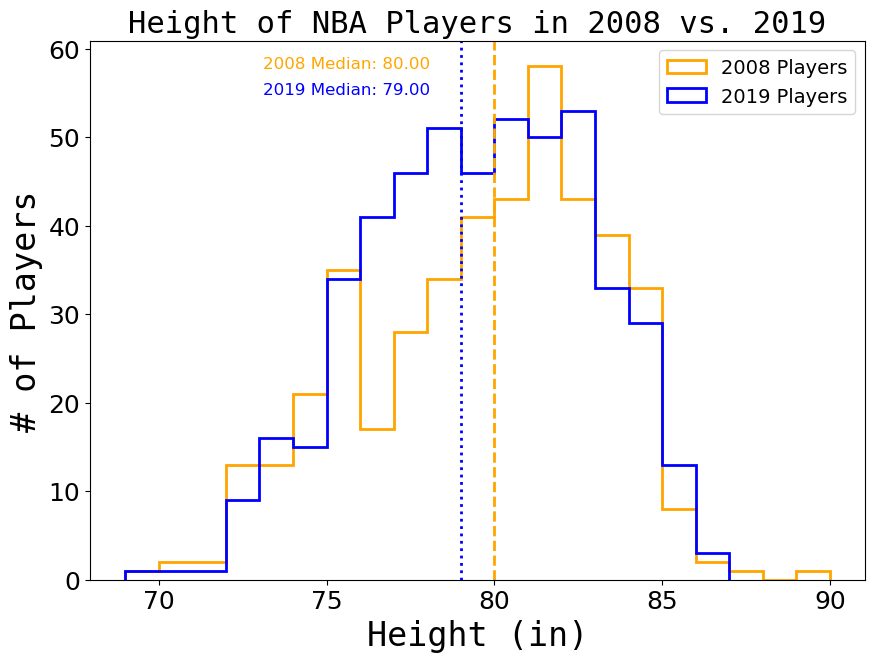

In [10]:
bins_new = checkBins(newHeight)

# histtype allows us to just plot the outer line of the histogram 
# We can add labels to the data being plotted so that the .legend() function knows which graph is which

# Histogram for 2008 data
plt.hist(oldHeight, bins=bins,
         histtype = 'step', color = 'orange', label = '2008 Players', linewidth=2) 

# Histogram for 2019 data
plt.hist(newHeight, bins=bins_new,
         histtype = 'step', color = 'b', label = '2019 Players', linewidth=2) 

# # Plot the average lines for both datasets (as well as text)
# plt.axvline(np.mean(oldHeight), color='b', linestyle='dashed', linewidth=2)
# plt.text(np.mean(oldHeight)-1, plt.ylim()[1]*0.9+3, f'2008 Mean: {np.mean(oldHeight):.2f}', 
#          color='b', ha='right',fontsize = 12)

# plt.axvline(np.mean(newHeight), color='orange', linestyle='dotted', linewidth=2)
# plt.text(np.mean(newHeight)-0.90, plt.ylim()[1]*0.9, f'2019 Mean: {np.mean(newHeight):.2f}', 
#          color='orange', ha='right',fontsize = 12)

# Plot the median lines for both datasets (as well as text)
plt.axvline(np.median(oldHeight), color='orange', linestyle='dashed', linewidth=2)
plt.text(np.median(oldHeight)-1.9, plt.ylim()[1]*0.9+3, f'2008 Median: {np.median(oldHeight):.2f}', 
         color='orange', ha='right',fontsize = 12)

plt.axvline(np.median(newHeight), color='b', linestyle='dotted', linewidth=2)
plt.text(np.median(newHeight)-0.90, plt.ylim()[1]*0.9, f'2019 Median: {np.median(newHeight):.2f}', 
         color='b', ha='right',fontsize = 12)

plt.xlabel('Height (in)', fontsize = 24, fontfamily = 'monospace')
plt.ylabel('# of Players', fontsize = 24, fontfamily = 'monospace')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Height of NBA Players in 2008 vs. 2019', fontsize = 22, fontfamily = 'monospace')
plt.legend(loc='best', fontsize = 14) #other locations 
plt.rcParams['figure.figsize'] = [10,7] 
plt.show()

Interestingly enough, the mean height of NBA players has stayed the same over a decade (decreasingly slightly). However, since there are clear outliers in the 2008 data (which we can see easily with our Histogram), a median may be a better metric for taking the average. In this case, the height has decreased by a full inch over a decade!

# Wrap-Up and Conclusions

Congratulations on making your own pretty-plot!

By now, you should have a firm understanding of visualizing and interpreting the distribution of datasets through the use of histograms. Notably, we covered how to import necessary libraries like Matplotlib, NumPy, and Pandas; how to prepare your data; and the steps to create, customize, and enhance your histograms with labels, titles, and adjusted label sizes for better readability (and of course-- making your own "pretty-plot).

Of course, these skills are only just the start...Being able to visualize data in a clear and coherent manner is a very skillful tool that often many overlook. Try a variety of customization choices, experiment with different data sets, and observe how changing bin sizes or ranges can provide affect the presentation of your data.

Thank you for using our tutorial & Happy Plotting,

__*Created by Ben Gordon, Aidan Admadjaja, George Fanaras & Supriti Karki*__



